# List Comprehensions, Generators, Generator Expressions

[back to main page](../index.ipynb)

These are some of the greatest features of Python, you should definitely know how to use them!

## List Comprehensions

Python's [list comprehesion](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) feature allows us to concisely create new lists from existing sequences.

This doesn't sound too spectacular, but wait until you see what you can do with them ...

First of all, we need a sequence of example data that we will use as basis for the following list comprehension examples:

In [1]:
numbers = 4, 9, 7, 20, 6, 33, 13, 23, 16, 62, 8

### Shallow Copy

The simplest (and mostly useless) form of a list comprehension is just a dull repetition of all sequence elements into a new list:

In [2]:
[x for x in numbers]

[4, 9, 7, 20, 6, 33, 13, 23, 16, 62, 8]

I'm showing this just for didactical purposes, in practice there is a simpler and less confusing way to get the exact same thing:

In [3]:
list(numbers)

[4, 9, 7, 20, 6, 33, 13, 23, 16, 62, 8]

The [list()](https://docs.python.org/3/library/stdtypes.html#list) constructor takes any *iterable* and turns it into a list, so there is no need for a list comprehension here.

### Map

Imagine you want to evaluate an expression (e.g. `2 * x`) for every item in a sequence and store all the results in a new list.

It's as easy as that:

In [4]:
[2 * x for x in numbers]

[8, 18, 14, 40, 12, 66, 26, 46, 32, 124, 16]

Alternatively, we could also use the built-in function [map()](https://docs.python.org/3/library/functions.html#map) to map a given function to each of the items in a sequence.

But to be able to do that, we have to turn our expression into a proper function:

In [5]:
def two_times(x):
    return 2 * x

Now we can pass this function, together with the initial sequence, to `map()`:

In [6]:
map(two_times, numbers)

What comes out of this is not a list, but a `map` object.
This is a *lazy sequence*, i.e. an iterator (see [below](#Iterators) for an explanation) that yields its items *on demand*, not all at once.

If you want to see them at once anyway, you can use the `list()` constructor again, which iterates over all results and puts them into a new list:

In [7]:
list(map(two_times, numbers))

[8, 18, 14, 40, 12, 66, 26, 46, 32, 124, 16]

Defining a named function (and especially coming up with a meaningful name) can be cumbersome, especially if the function only returns a single expression.

In this case you can use Python's [lambda](https://docs.python.org/3/reference/expressions.html#lambda) keyword to define an in-line anonymous function directly within the call to `map()`:

In [8]:
list(map(lambda x: 2 * x, numbers))

[8, 18, 14, 40, 12, 66, 26, 46, 32, 124, 16]

This is nearly as concise, but the list comprehension above is easier to grasp, isn't it?

### Filter

Imagine you want to create a list with items from another sequence, but only those which satisfy a given condition.

This can be done by throwing an `if` into the list comprehension:

In [9]:
[x for x in numbers if x > 10]

[20, 33, 13, 23, 16, 62]

It should be quite clear what the above line does.

But as before, there is also an alternative way to get the same result, namely using the built-in [filter()](https://docs.python.org/3/library/functions.html#filter) function:

In [10]:
list(filter(lambda x: x > 10, numbers))

[20, 33, 13, 23, 16, 62]

Here we directly used a lambda function to express our condition.

If the condition is more complicated, it can of course be encapsulated in a function, e.g.:

In [11]:
def my_condition(x):
    """A very strange condition."""
    if x % 2 == 0:
        x //= 2
    elif x % 3 == 0:
        x += 4
    return 3 < x < 10

Such a conditional function (sometimes called *predicate*) can be used in a list comprehension ...

In [12]:
[x for x in numbers if my_condition(x)]

[7, 16, 8]

... and with `filter()`:

In [13]:
list(filter(my_condition, numbers))

[7, 16, 8]

In this case it is largely a matter of taste which of the two alternatives you should use.

### Map + Filter

As you can imagine, it's possible to combine the mapping of an expression to a list and the filtering of this list:

In [14]:
[2 * x for x in numbers if x > 10]

[40, 66, 26, 46, 32, 124]

This can of course also be done with a combination of `map()` and `filter()`, but list comprehensions are often easier to read.

In [15]:
list(map(lambda x: 2 * x, filter(lambda x: x > 10, numbers)))

[40, 66, 26, 46, 32, 124]

### Map With `if`/`else`-Expression

The first part of a list comprehension can be an arbitrary *expression*, but *statements* are not allowed.
That's one of the situations where an `if`/`else`-expression (a.k.a. [conditional expression](https://docs.python.org/3/reference/expressions.html#conditional-expressions)) can come in handy:

In [16]:
[x * 100 if x < 5 else x * 10 for x in numbers]

[400, 90, 70, 200, 60, 330, 130, 230, 160, 620, 80]

### Nested Sequences

A sequence can itself contain sequences, e.g. a sequence of numbers consists of sequences of digits:

In [17]:
[str(x) for x in numbers]

['4', '9', '7', '20', '6', '33', '13', '23', '16', '62', '8']

If the initial sequence is such a nested sequence, the list comprehension can operate on the flattened sequence by using multiple `for`-parts:

In [18]:
[int(c) for x in numbers for c in str(x)]

[4, 9, 7, 2, 0, 6, 3, 3, 1, 3, 2, 3, 1, 6, 6, 2, 8]

Note that the first `for`-part concerns the outer list and the second one the inner lists, just as in two nested `for` loops:

In [19]:
mylist = []
for x in numbers:
    for c in str(x):
        mylist.append(int(c))

mylist

[4, 9, 7, 2, 0, 6, 3, 3, 1, 3, 2, 3, 1, 6, 6, 2, 8]

However, if you want the output list also to be nested, you can use a separate (inner) list comprehension as the first part of another (outer) list comprehension:

In [20]:
[[int(c) for c in str(x)] for x in numbers]

[[4], [9], [7], [2, 0], [6], [3, 3], [1, 3], [2, 3], [1, 6], [6, 2], [8]]

### Filtering Nested Sequences

Of course, you can also add an `if`-part to a nested list comprehension:

In [21]:
[int(c) for x in numbers if x > 10 for c in str(x)]

[2, 0, 3, 3, 1, 3, 2, 3, 1, 6, 6, 2]

Apparently, the position of the `if`-part doesn't matter, it can be either between the `for`-parts or after them.

In [22]:
[int(c) for x in numbers for c in str(x) if x > 10]

[2, 0, 3, 3, 1, 3, 2, 3, 1, 6, 6, 2]

And you can have more than one `if`-parts. You can have one for each `for`-part.

In [23]:
[int(c) for x in numbers if x > 10 for c in str(x) if c not in ('3', '6')]

[2, 0, 1, 2, 1, 2]

### Replacing `for`-Loops With List Comprehensions

People who come to Python from other languages tend to create empty lists and then `append()` to them within a `for`-loop like this:

In [24]:
newlist = []
for n in numbers:
    if n % 2 != 0:
        newlist.append(n**2)

It's of course *possible* to do this, but for reasonably short expressions it is much *nicer* to replace this with a list comprehension:

In [25]:
newlist = [n**2 for n in numbers if n % 2 != 0]

This is the way how it's done in Python!

## Set Comprehensions, Dictionary Comprehensions

For completeness' sake, let me mention `set` and `dict` comprehensions here.

Set comprehensions look very much like `list` comprehensions, except that they are enclosed in a pair of braces instead of brackets.

And of course they create a `set`, i.e. there are no duplicates and you shouldn't rely on the order of items.

In [26]:
{int(c) for x in numbers for c in str(x)}

{0, 1, 2, 3, 4, 6, 7, 8, 9}

All the rest works the same as in list comprehensions.

There is another type of comprehensions that is enclosed in braces: dictionary comprehensions.
The difference is that `dict` comprehensions use a pair of values with a colon inbetween.
The expression in front of the colon is evaluated and specifies a *key*, while the expression after the colon provides the corresponding *value*.

Let's look at this very silly example for a dict comprehension (which also includes a list comprehension just for the sake of it):

In [27]:
{str(x): [int(c) for c in str(x)] for x in numbers}

{'4': [4],
 '9': [9],
 '7': [7],
 '20': [2, 0],
 '6': [6],
 '33': [3, 3],
 '13': [1, 3],
 '23': [2, 3],
 '16': [1, 6],
 '62': [6, 2],
 '8': [8]}

Set comprehensions and dictionary comprehensions are by far not as common as list comprehensions, but it's still good to know them.

But now for something completely different ...

## Iterators

*Iterators* are a completely different topic, but they are necessary to understand [generators](#Generators) which, combined with features from list comprehensions will finally lead us to [generator expressions](#Generator-Expressions) (which are awesome).

There are many *iterable* built-in objects in Python, e.g. lists, tuples, strings, files. There are many more *iterable* objects in the standard library and in third-party libraries.
The concept of iterable objects (often just called *iterables*) is very important in Python.

If you want to *iterate* over an *iterable* you can get an *iterator* by calling the built-in [iter()](https://docs.python.org/3/library/functions.html#iter) function.

In [28]:
it = iter(numbers)

Iterators are very simple (but powerful!). The only thing you can do to them, is call the built-in function [next()](https://docs.python.org/3/library/functions.html#next) on them:

In [29]:
next(it)

4

... and again ...

In [30]:
next(it)

9

... and again ...

In [31]:
next(it)

7

... and again ...

In [32]:
next(it)

20

An iterator object is itself iterable, therefore we can use the `list()` constructor to turn the remaining elements into a list:

In [33]:
list(it)

[6, 33, 13, 23, 16, 62, 8]

This basically calls `next(it)` repeatedly and collects the results into a list.

But what happens if the iterator is exhausted?
How does the list constructor know that there are no more items left to iterate over?

That's easy: if `next()` is called on an exhausted iterator, an exception of the type [StopIteration](https://docs.python.org/3/library/exceptions.html#StopIteration) is raised.

A very common use of an iterator is in a `for` loop.
In this case the interpreter internally calls `iter()` and then calls `next()` on the resulting iterator assigning the result to the loop variable.
After the loop body, `next()` is called again and the process is repeated until a `StopIteration` is raised.

When we just use a `for`-loop, we don't have to worry about `iter()` and `next()`, but that's what's going on under the hood.

In [34]:
for n in numbers:
    print(n * '.')

....
.........
.......
....................
......
.................................
.............
.......................
................
..............................................................
........


As I mentioned above, an *iterator* is itself *iterable*, i.e. we can again call `iter()` on it.
But don't worry about calling `iter()` too often.
If it is called on something that's already and iterator, it will just return the thing unchanged:

In [35]:
it = iter(numbers)
it is iter(it) is iter(iter(it)) is iter(iter(iter(it)))

True

## Generators

Iterating over an existing sequence is very simple and useful, but there are two cases where this may not be feasible anymore:

* If creating a single list element takes a non-negligible amount of time you might not want to create a whole list of them before you start working with the list elements.
Wouldn't it be nice to create a sequence one item at a time? Then we could start processing the first element immediately and don't have to wait for the whole list to be created.

* If we are dealing with a very long sequence, building a list of it will need a lot of memory at once.
If we only need to process one item element at a time, wouldn't it be nice to avoid wasting all that memory and just process the sequence elements one by one?

That's where *generators* come in.
*Generator objects* are *iterable*, but they don't necessarily store all items.
They only produce one item at a time.

*Generator objects* are created by calling *generator functions*.
A *generator function* looks very much like a normal function, but instead of a `return` statement (or several) it has one or more `yield` statements.

This is a really silly example of a *generator function* which yields our numbers from above one by one:

In [36]:
def my_generator():
    yield 4
    yield 9
    yield 7
    yield 20
    yield 6
    yield 33
    yield 13
    yield 23
    yield 16
    yield 62
    yield 8

When we call this *generator function* we get a *generator object*:

In [37]:
my_generator()

<generator object my_generator at 0x7ff76c56c6d0>

Let's assign it to a variable:

In [38]:
g = my_generator()

Note that when running a *generator function*, the code *inside* is not (yet) executed.

Every *generator object* is an *iterator*, so we can call `next()` on it:

In [39]:
next(g)

4

When we call `next()`, the body of the *generator function* is executed until the first `yield` expression is encountered.
The value on the right side of the `yield` keyword is produced and the execution is stopped.

When we call `next()` again, the execution of the function continues at the statement where it was stopped before and the following statements are executed until the next `yield` expression is encountered.
At this point the corresponding value is produced and the execution is "frozen" again.

In [40]:
next(g)

9

Viewed from the outside, this just looks like any old iterable.
Let's turn whatever is left in the *generator object* into a list:

In [41]:
list(g)

[7, 20, 6, 33, 13, 23, 16, 62, 8]

After that the generator is exhausted (a `StopIteration` exception was raised within the `list()` constructor), we cannot really do anything else with it.

Calling `next()` again would just raise another `StopIteration` exception.

But of course we can call the *generator function* again to get a completely new *generator object* which can again be iterated over exactly once:

In [42]:
list(my_generator())

[4, 9, 7, 20, 6, 33, 13, 23, 16, 62, 8]

This example is really silly, the same thing could also be done with just a `list` of numbers.
But imagine producing one of these number would take a long time.
Then it would be perfectly reasonable to compute and yield them one by one in a generator function.

And there is another use case where a `list` just wouldn't work: generators can be infinite!

To show this, we can create a generator function with an infinite loop that yields a value at each iteration:

In [43]:
def integers_starting_from(n):
    while True:
        yield n
        n += 1

When we call this function we get a generator ...

In [44]:
i = integers_starting_from(42)

... on which we can call `next()` ...

In [45]:
next(i)

42

... and again ...

In [46]:
next(i)

43

... and again ...

In [47]:
next(i)

44

... and we can do this arbitrarily often, until we get bored.

> Side note: Since Python can handle arbitrarily large integers, we can *really* do this arbitrarily often and we will each time get an even larger number, the numbers will never overflow (unless there is a bug in the Python interpreter).

This time we cannot create a `list` of the remaining items, because this list would grow infinitely large!

To avoid an infinitely large list, we can create another generator function that takes a generator, yields a finite number of items and then stops:

In [48]:
def take15(it):
    for _ in range(15):
        yield next(it)

In [49]:
many_integers = integers_starting_from(42)

In [50]:
list(take15(many_integers))

[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]

In [51]:
list(take15(many_integers))

[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]

But is wasn't even necessary to write our own generator function for this, the Python standard library already has such a thing: [itertools.islice()](https://docs.python.org/3/library/itertools.html#itertools.islice).
It's only an import away ...

In [52]:
import itertools

With the help of this, let's create a helper function that returns a list with the first 15 elements of a (possibly infinite) generator.

In [53]:
def list15(it):
    return list(itertools.islice(it, 15))

In [54]:
list15(integers_starting_from(42))

[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]

We will use this below to quickly check the first few values of an infinite generator.

By the way, our `integers_starting_from()` generator function is also already available in the `itertools` library under the name [itertools.count()](https://docs.python.org/3/library/itertools.html#itertools.count).

In [55]:
itertools.count(42)

count(42)

This returns a special `count` object, which is iterable and yields increasing values forever, just like the generator returned by `integers_starting_from()`.

In [56]:
list15(itertools.count(42))

[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]

### Map and Filter for Generators

Similar to what we saw above, we can also *filter* elements from a generator and we can also *map* a function/expression on the sequence yielded by a generator.

One way to do this, is to create a new generator function:

In [57]:
def square_evens(it):
    for x in it:
        if x % 2 == 0:
            yield x**2

In [58]:
list15(square_evens(itertools.count(1)))

[4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576, 676, 784, 900]

It is of course also possible to do this with the functions `map()` and `filter()`:

In [59]:
list15(map(lambda x: x**2, filter(lambda x: x % 2 == 0, itertools.count(1))))

[4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576, 676, 784, 900]

This doesn't really look nice, wouldn't it be great if we could use a similar syntax as with list comprehensions?

Which leads us to the climax of this page ...

## Generator Expressions

Generator expressions look very similar to list comprehensions, but instead of a finite-size `list`, they return a generator object.

In fact, they look exactly like list comprehensions, just without the brackets surrounding the expression.
In some cases, we have to surround generator expressions with parentheses, because otherwise the code would be ambiguous:

In [60]:
squares_of_evens = (x**2 for x in itertools.count(1) if x % 2 == 0)

The whole generator expression evalutes to a *generator object*:

In [61]:
squares_of_evens

<generator object <genexpr> at 0x7ff76c578f50>

In this case the generator object is infinite, so let's only look at the first few items:

In [62]:
list15(squares_of_evens)

[4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576, 676, 784, 900]

If we only need the generator expression once, we can drop the assignment and use it directly (in any place where an *iterator* is expected).

In [63]:
list15(x**2 for x in itertools.count(1) if x % 2 == 0)

[4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576, 676, 784, 900]

Note: Here we didn't need an additional pair of parentheses!

Conceptually, a list comprehension is just a generator expression that's immediately turned into a `list`:

In [64]:
list(x for x in numbers if x > 10)  # a generator expression as argument to list()

[20, 33, 13, 23, 16, 62]

In [65]:
[x for x in numbers if x > 10]  # a list comprehension

[20, 33, 13, 23, 16, 62]

## Reduce

TODO: sum, any, all, min, max

TODO: mention [functools.reduce()](https://docs.python.org/3/library/functools.html#functools.reduce)?

## Example: The Sieve Of Eratosthenes

This example is taken from the very famous book "Structure and Interpretation of Computer Programs" (SICP).
The example can be found in [chapter 3.5](https://mitpress.mit.edu/sicp/full-text/book/book-Z-H-24.html) and in the [Video Lecture 6B on YouTube](https://youtu.be/DCub3iqteuI).

Let's look at this video where Hal Abelson explains the [Sieve Of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes):

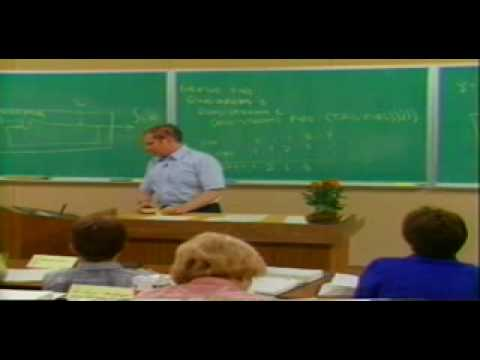

In [66]:
from IPython.display import YouTubeVideo
YouTubeVideo("DCub3iqteuI", start=495)

To implement the *sieve*, we can use a recursive generator function:

In [67]:
def sieve(stream):
    x = next(stream)
    yield x
    yield from sieve(y for y in stream if y % x != 0)

In SICP, they are using what they call "streams" (implemented in LISP) to represent the infinite sequences of natural numbers and of prime numbers, respectively.

We can get a similar thing in Python by using generators.
The generator function `sieve()` takes the first element from a "stream" and yields it.
Afterwards, it calls itself recursively using a generator expression that filters the remaining sequence.

The filtering could of course also done with filter(), see [above](#Filter), but the generator expression is more Pythonic.

To get our infinite sequence of prime numbers, we have to apply the `sieve()` to the natural numbers starting with 2.

In [68]:
def primes():
    return sieve(itertools.count(2))

Calling this function returns an infinite generator object that yields all primes on demand.

In [69]:
list15(primes())

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

Those seem to be the right numbers, but this recursive Python implementation has a problem when we look for larger prime numbers.

To see that, let's create a helper function that shows only one given item from the sequence instead of the first few:

In [70]:
def nth(n, it):
    """Return n-th element (0-based) from iterable it."""
    return next(itertools.islice(it, n, None))

In [71]:
nth(0, primes())

2

In [72]:
nth(9, primes())

29

While we're at it, let's measure how long the computation takes for a somewhat larger number ...

In [73]:
%time nth(482, primes())

CPU times: user 30.6 ms, sys: 0 ns, total: 30.6 ms
Wall time: 34.1 ms


3457

This works fine with small numbers, but there is a limit (depending on your Python interpreter settings), you can try it on your own:

In [74]:
#nth(490, primes())  # maximum recursion depth exceeded!

The problem is that (C)Python doesn't eliminate tail recursion.
In other languages (e.g. LISP) this would work fine, but not in Python.
It's possible to increase the recursion depth in the Python interpreter, but this would just shift the problem to slightly larger numbers.

But anyway, why would we solve an iterative problem with a recursive solution?

We can easily create an iterative implementation by applying a few minor changes:

In [75]:
def primes2():
    collected_primes = []
    for x in itertools.count(2):
        if all(x % p != 0 for p in collected_primes):
            yield x
            collected_primes.append(x)

Now, instead of storing the intermediate state on the stack (where it's hidden in the recursive implementation), we just explicitly create a list of all so far known primes and append each newly found prime number to this list.

> Important Note: The function all() is short-circuiting, i.e. the divisibility test is only executed until the first match.
It's important to use a generator expression here, because if we would use a list comprehension instead, the predicate would be calculated for all items and the whole intermediate list would have to be created on each iteration. This would be much slower and use more memory.

Let's compare this with our previous implementation:

In [76]:
%time nth(482, primes2())

CPU times: user 21.7 ms, sys: 0 ns, total: 21.7 ms
Wall time: 22.1 ms


3457

The new iterative implementation of course yields the same result as before, but it is also faster!

And now we don't have this silly recursion limit, it also works with much larger numbers:

In [77]:
%time nth(5000, primes2())

CPU times: user 1.16 s, sys: 158 µs, total: 1.16 s
Wall time: 1.17 s


48619

Some time after writing the above implementation, I stumbled upon a blog post called [List, Dict and Set Comprehensions By Example](https://www.smallsurething.com/list-dict-and-set-comprehensions-by-example/), which also uses the Sieve of Eratosthenes as an example.
However, it doesn't use generators but set comprehensions (which I only mentioned very shortly [above](#Set-Comprehensions,-Dictionary-Comprehensions)).
It also has a different API, since it doesn't produce the results one by one, but instead calculates all prime numbers up to a given upper limit.

The original code has a second set comprehension in the last line.
I took the liberty of changing that into a list comprehension, since there are no duplicates anymore at this point and the order is actually relevant.

In [78]:
def eratosthenes(n):
    # Based on: https://www.smallsurething.com/list-dict-and-set-comprehensions-by-example/
    not_prime = {j for i in range(2, n) for j in range(i * 2, n, i)}
    return [i for i in range(2, n) if i not in not_prime]

As it turns out, this not only works but it is also significantly faster!

In [79]:
%time result = eratosthenes(48622)
len(result), result[-1]

CPU times: user 44.3 ms, sys: 4.01 ms, total: 48.3 ms
Wall time: 47.8 ms


(5001, 48619)

That's it, have fun generating prime numbers!

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>